In [1]:
import datetime
from datetime import date
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import numpy as np

#define the current path
curr_path = str(pathlib.Path().absolute())

#future_date = datetime.today() #https://www.programiz.com/python-programming/datetime/current-datetime
future_date = datetime.datetime.now().date()
past_date = datetime.date(2000, 1, 1)

#date time difference for stock df extraction Yahoo Finance
#https://www.kite.com/python/answers/how-to-find-the-number-of-seconds-between-two-datetime-objects-in-python
difference = (future_date - past_date)
total_seconds = difference.total_seconds()

#variable to get the current period in seconds compared to the base period jan 1st 2000
current_seconds = round(946684800 + total_seconds) 


In [2]:
#subset of stocks which went public before 2000 and make the symbols as a list
#create a list of stock symbols https://stackoverflow.com/questions/22341271/get-list-from-pandas-dataframe-column-or-row
stock_df =  pd.read_csv(""+curr_path+"\\Input\\nasdaq.csv")
stock_df_20 =  stock_df[stock_df['IPO Year']<=1999]
stock_sy = stock_df_20[['Symbol']]
stock_sy.reset_index(drop=True, inplace=True)
stocks = stock_sy['Symbol'].tolist()

In [3]:
#example for apple
#stock_name = 'AAPL' 
#link = 'https://query1.finance.yahoo.com/v7/finance/download/' + str(stock_name) + '?period1=946684800&period2=' + str(current_seconds) + '&interval=1d&events=history&includeAdjustedClose=true'
#https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=946684800&period2=1620172800&interval=1d&events=history&includeAdjustedClose=true


In [4]:
#loop to create a full list of all stocks df
all_stocks = []
for symbols in stocks:
    link = 'https://query1.finance.yahoo.com/v7/finance/download/' + str(symbols) + '?period1=946684800&period2=' + str(current_seconds) + '&interval=1d&events=history&includeAdjustedClose=true'
    all_stocks.append(pd.read_csv(link))

In [5]:
#loop to calculate columns in each of the stock dataframes
#low and high are the extremes for the moving averages
low = 10 
high = 50
N = len(all_stocks)

for i in range(N):        
     #price 1 to get the open price of tomorrow in the same row
     #difference in price from today and tomorrow
     #daily return as the gain or loss compared to the close price
     #direction column depending on sign of Price diff via list of compr
     #moving average for 3 periods Average 3 with shift method
     #moving average over 10 days
     #moving average over 50 days
     #shares hold/buy or sell. If MA10 > MA50 Buy or Hold (strategy Long)
     #profit calculate the return in case Shares ==1
     #cumulative wealth of the total profit given the strategy
    try:
        all_stocks[i]['Price1'] = all_stocks[i]['Close'].shift(-1) 
        all_stocks[i]['Price diff'] = all_stocks[i]['Price1'] - all_stocks[i]['Close'] 
        all_stocks[i]['Return'] = all_stocks[i]['Price diff']/all_stocks[i]['Close'] 
        all_stocks[i]['Direction'] = [1 if all_stocks[i].loc[ei,'Price diff'] > 0 else -1 for ei in all_stocks[i].index] 
        all_stocks[i]['Average3'] = (all_stocks[i]['Close'] + all_stocks[i]['Close'].shift(1) + all_stocks[i]['Close'].shift(2))/3
        all_stocks[i]['MA10'] = all_stocks[i]['Close'].rolling(low).mean()
        all_stocks[i]['MA50'] = all_stocks[i]['Close'].rolling(high).mean()
        all_stocks[i]['Shares'] = [1 if all_stocks[i].loc[ei,'MA10'] > all_stocks[i].loc[ei,'MA50'] else 0 for ei in all_stocks[i].index]
        all_stocks[i]['Profit'] = [all_stocks[i].loc[ei,'Price diff'] if all_stocks[i].loc[ei,'Shares']==1 else 0 for ei in all_stocks[i].index]
        all_stocks[i]['Wealth'] = all_stocks[i]['Profit'].cumsum()
        all_stocks[i]['Stock name'] = stocks[i]
        all_stocks[i]['St deviation'] = all_stocks[i]['Close'].values.std(ddof=1)   
    except:
        pass

In [6]:
#get scope of sctock
M = len(all_stocks)
stock_scope = []

for i in range(M):
    print(all_stocks[i]['Stock name'].unique())

print(stock_scope)
#stock_scope = pd.DataFrame(stock_scope)


['AAPL']
['ABCB']
['ADBE']
['ADTN']
['AEHR']
['AEIS']
['AHPI']
['AKAM']
['ALKS']
['ALOT']
['ALSK']
['ALXN']
['AMAT']
['AMGN']
['AMHC']
['AMKR']
['AMSC']
['AMWD']
['AMZN']
['ANSS']
['ARLP']
['ASML']
['ASTE']
['ATLC']
['AUDC']
['AVID']
['AWRE']
['AXTI']
['AZPN']
['BANF']
['BBBY']
['BBSI']
['BCRX']
['BMRN']
['BRKS']
['BSQR']
['CACC']
['CAKE']
['CALM']
['CAMP']
['CASH']
['CASY']
['CBRL']
['CENT']
['CENX']
['CERN']
['CERS']
['CGNX']
['CHKP']
['CHRW']
['CLWT']
['CMCO']
['CNBKA']
['COKE']
['COLB']
['COLM']
['CPRT']
['CPSS']
['CRAI']
['CREE']
['CRESY']
['CRUS']
['CSCO']
['CSGP']
['CSGS']
['CSII']
['CSPI']
['CTAS']
['CTHR']
['CTIB']
['CTIC']
['CTSH']
['CTXS']
['CWST']
['CYBE']
['DAIO']
['DAKT']
['DGICB']
['DGII']
['DISH']
['DLTR']
['DSPG']
['DSWL']
['EBAY']
['EDAP']
['EEFT']
['EGAN']
['ELTK']
['EMKR']
['EPAY']
['EVOL']
['EXTR']
['EZPW']
['FARO']
['FAST']
['FBNC']
['FCFS']
['FFIV']
['FISI']
['FISV']
['FLEX']
['FLWS']
['FONR']
['FORR']
['FOSL']
['GAIA']
['GERN']
['GIFI']
['GIII']
['GILD']
['GSBC'

In [15]:
#get index row for a given stock https://stackoverflow.com/questions/41217310/get-index-of-a-row-of-a-pandas-dataframe-as-an-integer
stock_name = 'AAPL'
stock_name_n = stock_sy[stock_sy['Symbol']==stock_name].index.values.astype(int)[0]
stock_name_n

0

In [16]:
all_stocks[stock_name_n].tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Price1,Price diff,Return,Direction,Average3,MA10,MA50,Shares,Profit,Wealth,Stock name,St deviation
5396,2021-06-15,129.940002,130.600006,129.389999,129.639999,129.639999,62746300,130.149994,0.509995,0.003934,1,129.156664,126.783999,128.9394,0,0.0,85.573427,AAPL,28.499535
5397,2021-06-16,130.369995,130.889999,128.460007,130.149994,130.149994,91815000,131.789993,1.639999,0.012601,1,130.089996,127.292998,129.0182,0,0.0,85.573427,AAPL,28.499535
5398,2021-06-17,129.800003,132.550003,129.649994,131.789993,131.789993,96721700,130.460007,-1.329986,-0.010092,-1,130.526662,128.117998,129.0960,0,0.0,85.573427,AAPL,28.499535
5399,2021-06-18,130.710007,131.509995,130.240005,130.460007,130.460007,108787300,132.300003,1.839996,0.014104,1,130.799998,128.574998,129.0980,0,0.0,85.573427,AAPL,28.499535
5400,2021-06-21,130.300003,132.410004,129.210007,132.300003,132.300003,79576500,NaN,NaN,NaN,-1,131.516668,129.214999,129.0840,1,NaN,NaN,AAPL,28.499535


In [42]:
#the last row with total wealth
all_stocks[stock_name_n].shape[0]-2

5399

In [66]:
index2 = all_stocks[0].shape[0]-1
index3 = all_stocks[0].shape[0]-2
last_wealth = all_stocks[stock_name_n].iloc[index3,16]

all_stocks[stock_name_n]['Wealth'].replace(np.nan, last_wealth, inplace=True) 

row = all_stocks[stock_name_n].iloc[index2]
row

Date                                                 2021-06-21
Open                                                      130.3
High                                                     132.41
Low                                                      129.21
Close                                                     132.3
Adj Close                                                 132.3
Volume                                                 79576500
Price1                                                      NaN
Price diff                                                  NaN
Return                                                      NaN
Direction                                                    -1
Average3                                                131.517
MA10                                                    129.215
MA50                                                    129.084
Shares                                                        1
Profit                                  

In [48]:
all_stocks[stock_name_n].iloc[[all_stocks[0].shape[0]-2],16]

5399    85.573427
Name: Wealth, dtype: float64

In [33]:
headers=all_stocks[0].columns.tolist()
headers

['Date',
 'Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Price1',
 'Price diff',
 'Return',
 'Direction',
 'Average3',
 'MA10',
 'MA50',
 'Shares',
 'Profit',
 'Wealth',
 'Stock name',
 'St deviation']

In [41]:
#need to redefine the columns first
#https://stackoverflow.com/questions/10715965/create-pandas-dataframe-by-appending-one-row-at-a-time
headers = all_stocks[0].columns.tolist()

#get df headers from a list
#https://stackoverflow.com/questions/51495800/pandas-python-how-to-create-multiple-columns-from-a-list

df_new = pd.DataFrame([], columns=headers)
for i in range(M):
    last_indx = all_stocks[i].shape[0]-2
    last_row = all_stocks[i].iloc[last_indx]
    df_new.loc[i] = last_row
df_new

,Date,Open,High,Low,Close,Adj Close,Volume,Price1,Price diff,Return,Direction,Average3,MA10,MA50,Shares,Profit,Wealth,Stock name,St deviation
0,2021-06-18,130.710007,131.509995,130.240005,130.460007,130.460007,108787300,132.300003,1.839996,0.014104,1,130.799998,128.574998,129.098000,0,0.000000,85.573427,AAPL,28.499535
1,2021-06-18,51.869999,52.500000,49.959999,50.029999,50.029999,1405600,52.189999,2.160000,0.043174,1,52.813333,54.522000,54.141000,1,2.160000,22.609523,ABCB,13.284679
2,2021-06-18,569.960022,570.000000,556.390015,565.590027,565.590027,6759900,567.349976,1.759949,0.003112,1,553.426676,537.582010,507.494004,1,1.759949,326.949369,ADBE,117.978432
3,2021-06-18,20.430000,20.750000,19.900000,20.049999,20.049999,507800,20.500000,0.450001,0.022444,1,20.763333,21.112000,19.235800,1,0.450001,-20.195002,ADTN,7.405106
4,2021-06-18,2.510000,2.560000,2.410000,2.440000,2.440000,246100,2.470000,0.030000,0.012295,1,2.516667,2.632000,2.336600,1,0.030000,-8.012500,AEHR,1.947661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,2021-06-18,131.259995,134.250000,129.710007,131.919998,131.919998,5276900,127.529999,-4.389999,-0.033278,-1,130.146665,128.421999,125.571800,1,-4.389999,-32.490653,XLNX,28.290557
289,2021-06-18,30.150000,31.850000,30.000000,30.410000,30.410000,24200,31.490000,1.080000,0.035515,1,30.619999,30.376000,32.891400,0,0.000000,371.009990,XOMA,930.739325
290,2021-06-18,64.540001,64.919998,62.959999,63.180000,63.180000,1939300,64.989998,1.809998,0.028648,1,64.603333,65.294000,66.368400,0,0.000000,19.202102,XRAY,14.931131
291,2021-06-18,499.250000,500.399994,484.339996,493.429993,493.429993,487100,504.130005,10.700012,0.021685,1,500.740000,505.245004,496.124802,1,10.700012,280.524459,ZBRA,87.220023


In [12]:
#how to get the standard deviation as a float
#https://stackoverflow.com/questions/25140998/pandas-compute-mean-or-std-standard-deviation-over-entire-dataframe
std = all_stocks[stock_name_n]['Close'].values.std(ddof=1)
print(std)

10.580050672727257


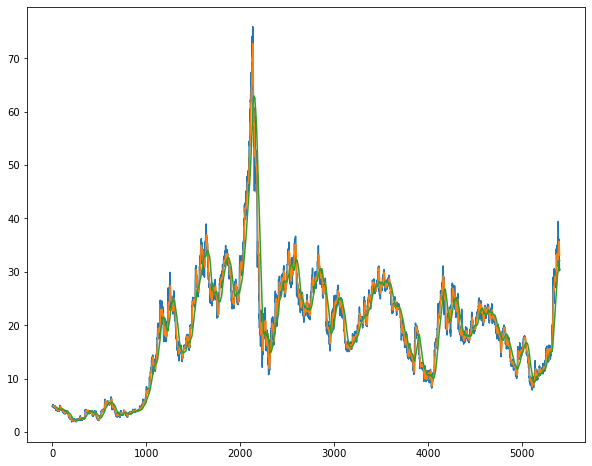

In [14]:
#plot the close time series with matplotlib
#plot MA10, since the gap between the Close and MA10 is smaller than MA50, MA10 is a fast signal
#plot MA50, since the gap between the Close and MA10 is smaller than MA50, MA50 is a slow signal
#dates = all_stocks[stock_name_n]['Date'].tolist()
#price = all_stocks[stock_name_n]['Close'].tolist()
#x = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]

#x = np.array([dates])
#y = np.array([price])


plt.figure(figsize=(10, 8))
all_stocks[stock_name_n]['Close'].plot()
all_stocks[stock_name_n]['MA10'].plot()
all_stocks[stock_name_n]['MA50'].plot()


plt.show()